# Likelihood exercise solutions

## Exercise 9.1

Write a program that generates pseudo-random numbers
distributed according to an exponential function
and stores them in a list.

In [1]:
from myrand import generate_exp

tau   = 2.
N_evt = 800

sample = generate_exp (tau, N_evt)

## Exercise 9.2

Add to the previous program the source code that fills a histogram
with the numbers present in the list where they have been transferred,
and displays the histogram on the screen.

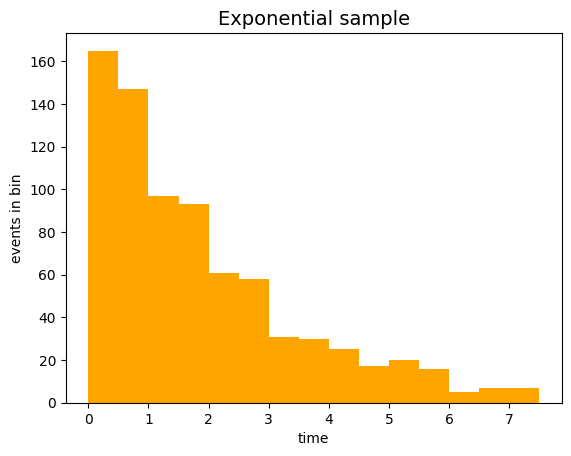

In [2]:
import numpy as np
import matplotlib.pyplot as plt

xMin = 0.                                    # minimum of the histogram drawing range
xMax = 4. * tau                              # maximum of the histogram drawing range
bin_edges = np.arange (xMin, xMax, tau/4.)   # edges o the histogram bins

# disegno della funzione
fig, ax = plt.subplots ()
ax.set_title ('Exponential sample', size=14)
ax.set_xlabel('time')
ax.set_ylabel('events in bin')
ax.hist (sample,
         bins = bin_edges,
         color = 'orange',
        )
plt.show ()

## Exercise 9.3

Write a program
that plots the exponential probability distribution
with a fixed parameter *t<sub>0</sub>*.

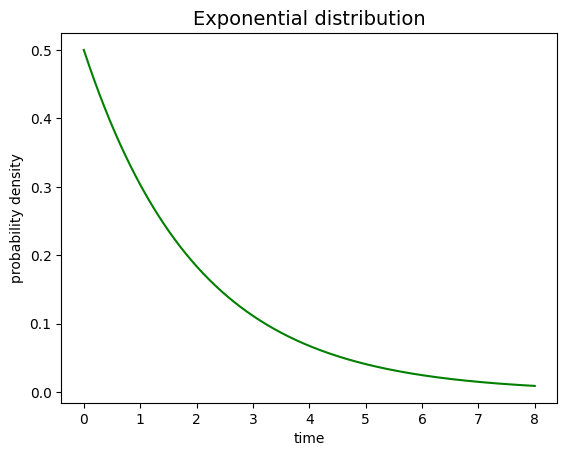

In [3]:
from likelihood import exp_pdf

fig, ax = plt.subplots ()
ax.set_title ('Exponential distribution', size=14)
ax.set_xlabel ('time')
ax.set_ylabel ('probability density')

x = np.linspace (xMin, xMax, 10000)
y = np.arange (0., x.size)
for i in range (x.size):
  y[i] = exp_pdf (x[i], tau)
plt.plot (x, y, 'g')
plt.show()

## Exercise 9.4

Write a function ```likelihood``` that calculates the likelihood
as the parameter *t<sub>0</sub>* varies,
for a sample of pseudo-random events generated according to the instructions of Exercise 1.
  * How does the result depend on the number of events in the sample?

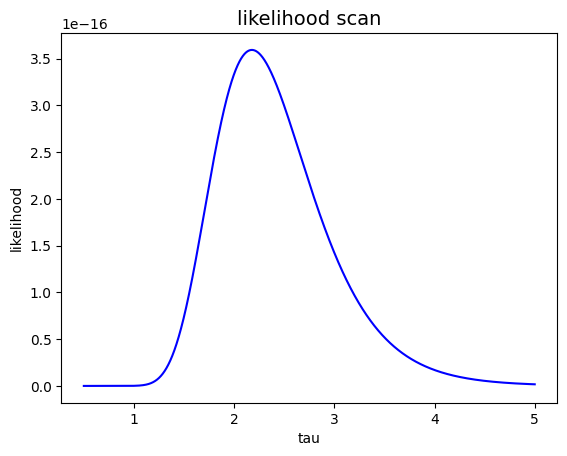

In [8]:
from likelihood import likelihood

fig, ax = plt.subplots ()
ax.set_title ('likelihood scan', size=14)
ax.set_xlabel ('tau')
ax.set_ylabel ('likelihood')

tau = np.linspace (0.5, 5., 10000)
lik = np.arange (0., tau.size)

for i in range (tau.size) :
    lik[i] = likelihood (tau[i], exp_pdf, sample[])

plt.plot (tau, lik, 'b')  #'b' indicates is the blue color
plt.show ()

## Exercise 9.5

Write a function ```loglikelihood``` that calculates the logarithm of the likelihood
as the parameter *t<sub>0</sub>* varies,
for a sample of pseudo-random events generated according to the instructions of Exercise 1.
Remember that the logarithm of the likelihood is defined
only when the *likelihood* is strictly positive.

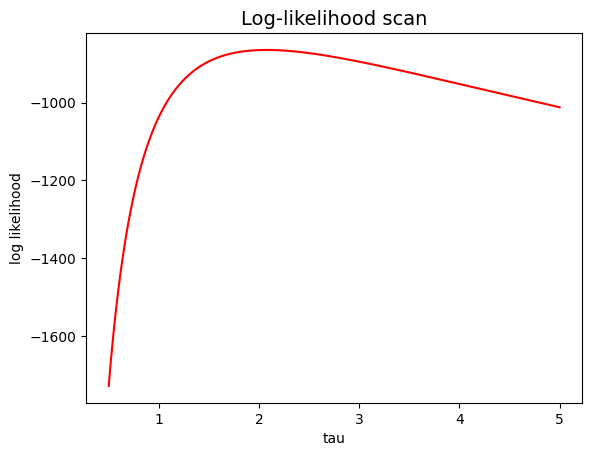

In [5]:
from likelihood import loglikelihood

fig, ax = plt.subplots ()
ax.set_title ('Log-likelihood scan', size=14)
ax.set_xlabel ('tau')
ax.set_ylabel ('log likelihood')

tau = np.linspace (0.5, 5., 10000)
ll  = np.arange (0., tau.size)

for i in range (tau.size) :
    ll[i] = loglikelihood (tau[i], exp_pdf, sample)

plt.plot (tau, ll, 'r')
plt.show ()

## Exercise 9.6

Study the behavior of the shape of the log-likelihood as a function of the number of events
comprising the generated sample.

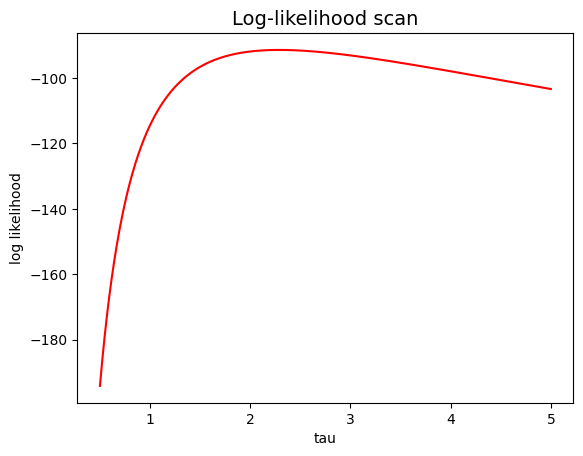

In [6]:
# reducing by a factor 10 the initial sample
subsample = sample[:int (len (sample)/10)]

fig, ax = plt.subplots ()
ax.set_title ('Log-likelihood scan', size=14)
ax.set_xlabel ('tau')
ax.set_ylabel ('log likelihood')

ll_1 = np.arange (0., tau.size)
for i in range (tau.size) :
    ll_1[i] = loglikelihood (tau[i], exp_pdf, subsample)

plt.plot (tau, ll_1, 'r')
plt.show ()    